In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('MetroPT3(AirCompressor).csv')
df.head()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,40,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [3]:

# Assuming you already have the dataset loaded into a pandas DataFrame called 'df'
# Convert the 'timestamp' column to datetime format if it's not already
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Create a new column that removes seconds to achieve minute-wise aggregation
df['timestamp_minute'] = df['timestamp'].dt.floor('T')

# Custom function to handle mode, ensuring we get a single value
def calculate_mode(series):
    mode_values = series.mode()
    if not mode_values.empty:
        return mode_values[0]  # Return the first mode value
    else:
        return series.iloc[0]  # If no mode, return the first value (fallback)

# Group the data by minute and aggregate
grouped_df = df.groupby('timestamp_minute').agg({
    'TP2': 'mean',
    'TP3': 'mean',
    'H1': 'mean',
    'DV_pressure': 'mean',
    'Reservoirs': 'mean',
    'Oil_temperature': 'mean',
    'Motor_current': 'mean',
    'DV_eletric': calculate_mode,
    'COMP': calculate_mode,
    'Towers': calculate_mode,
    'MPG': calculate_mode,
    'LPS': calculate_mode,
    'Pressure_switch': calculate_mode,
    'Oil_level': calculate_mode,
    'Caudal_impulses': calculate_mode
}).reset_index()

# Save the resulting dataset to a new CSV file (optional)
grouped_df.to_csv('shorter_dataset.csv', index=False)

# View the resulting dataset
print(grouped_df.head())


     timestamp_minute       TP2       TP3        H1  DV_pressure  Reservoirs  \
0 2020-02-01 00:00:00 -0.012286  9.327429  9.311143    -0.022857    9.328000   
1 2020-02-01 00:01:00 -0.013000  9.260000  9.243333    -0.023333    9.259667   
2 2020-02-01 00:02:00 -0.012667  9.198333  9.182000    -0.022333    9.199000   
3 2020-02-01 00:03:00 -0.012333  9.136667  9.120667    -0.022667    9.136667   
4 2020-02-01 00:04:00 -0.013000  9.075667  9.060000    -0.023000    9.075667   

   Oil_temperature  Motor_current  DV_eletric  COMP  Towers  MPG  LPS  \
0        53.521429       0.040357         0.0   1.0     1.0  1.0  0.0   
1        53.420833       0.040000         0.0   1.0     1.0  1.0  0.0   
2        53.325000       0.040000         0.0   1.0     1.0  1.0  0.0   
3        53.200000       0.040000         0.0   1.0     1.0  1.0  0.0   
4        53.129167       0.040000         0.0   1.0     1.0  1.0  0.0   

   Pressure_switch  Oil_level  Caudal_impulses  
0              1.0        1.0  

In [24]:
df=pd.read_csv('shorter_dataset.csv')

In [25]:
print("Shape of the dataset:", df.shape)
print("Columns in the dataset:", df.columns)
df.info()


Shape of the dataset: (252720, 15)
Columns in the dataset: Index(['timestamp_minute', 'TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs',
       'Oil_temperature', 'Motor_current', 'DV_eletric', 'Towers', 'MPG',
       'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252720 entries, 0 to 252719
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp_minute  252720 non-null  object 
 1   TP2               252720 non-null  float64
 2   TP3               252720 non-null  float64
 3   H1                252720 non-null  float64
 4   DV_pressure       252720 non-null  float64
 5   Reservoirs        252720 non-null  float64
 6   Oil_temperature   252720 non-null  float64
 7   Motor_current     252720 non-null  float64
 8   DV_eletric        252720 non-null  float64
 9   Towers            252720 non-null  float64
 10  MPG        

In [26]:
df.describe().round(3)

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
count,252720.000,252720.000,252720.000,252720.000,252720.000,252720.000,252720.000,252720.000,252720.000,252720.000,252720.000,252720.000,252720.000,252720.000
mean,1.381,8.981,7.551,0.055,8.982,62.643,2.056,0.161,0.918,0.826,0.004,1.000,0.909,0.942
std,3.072,0.637,3.170,0.358,0.636,6.500,2.233,0.367,0.274,0.379,0.059,0.018,0.287,0.234
min,-0.026,0.808,-0.026,-0.031,0.791,15.400,0.020,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,-0.014,8.490,8.230,-0.022,8.491,57.775,0.041,0.000,1.000,1.000,0.000,1.000,1.000,1.000
50%,-0.012,8.954,8.739,-0.020,8.955,62.779,0.045,0.000,1.000,1.000,0.000,1.000,1.000,1.000
75%,-0.010,9.489,9.329,-0.017,9.489,67.212,3.799,0.000,1.000,1.000,0.000,1.000,1.000,1.000
max,10.497,10.252,10.192,3.526,10.254,88.796,6.363,1.000,1.000,1.000,1.000,1.000,1.000,1.000


Features starting from COMP onwards are binary

In [27]:
print("Unique value count :")
print(df.nunique())

Unique value count :
timestamp_minute    252720
TP2                  26971
TP3                  23394
H1                   27811
DV_pressure          10222
Reservoirs           23408
Oil_temperature      27587
Motor_current        22673
DV_eletric               2
Towers                   2
MPG                      2
LPS                      2
Pressure_switch          2
Oil_level                2
Caudal_impulses          2
dtype: int64


In [28]:
columns_to_count = ['COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']
# Display value counts for each specified column
for col in columns_to_count:
    print(f"Value counts for column '{col}':")
    print(df[col].value_counts())
    print("\n")

Value counts for column 'COMP':


KeyError: 'COMP'

In [29]:
df.columns

Index(['timestamp_minute', 'TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs',
       'Oil_temperature', 'Motor_current', 'DV_eletric', 'Towers', 'MPG',
       'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses'],
      dtype='object')

In [30]:
# Convert 'timestamp' column to datetime format for proper filtering
df['timestamp'] = pd.to_datetime(df['timestamp'])


KeyError: 'timestamp'

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516948 entries, 0 to 1516947
Data columns (total 17 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   Unnamed: 0       1516948 non-null  int64         
 1   timestamp        1516948 non-null  datetime64[ns]
 2   TP2              1516948 non-null  float64       
 3   TP3              1516948 non-null  float64       
 4   H1               1516948 non-null  float64       
 5   DV_pressure      1516948 non-null  float64       
 6   Reservoirs       1516948 non-null  float64       
 7   Oil_temperature  1516948 non-null  float64       
 8   Motor_current    1516948 non-null  float64       
 9   COMP             1516948 non-null  float64       
 10  DV_eletric       1516948 non-null  float64       
 11  Towers           1516948 non-null  float64       
 12  MPG              1516948 non-null  float64       
 13  LPS              1516948 non-null  float64       
 14  Pr

In [11]:
# If want to filter first 3 months


# # Convert 'timestamp' column to datetime format for proper filtering
# df['timestamp'] = pd.to_datetime(df['timestamp'])

# Define the date range for the first three months (from February to April)
start_date = '2020-02-01'
end_date = '2020-04-30'

# Filter the DataFrame for the specified date range
filtered_df = df[(df['timestamp'] >= start_date) & (df['timestamp'] <= end_date)]

# Save the filtered DataFrame to a new CSV file
filtered_df.to_csv('filtered_dataset.csv', index=False)

# Display a confirmation message with number of records
print(f"Filtered dataset has been saved as 'filtered_dataset.csv' with {len(filtered_df)} records.")



Filtered dataset has been saved as 'filtered_dataset.csv' with 640142 records.


In [12]:
# Filter the DataFrame for the specified date range
filtered_df = df.iloc[:100000,:]

# Save the filtered DataFrame to a new CSV file
filtered_df.to_csv('filtered_dataset.csv', index=False)

# Display a confirmation message with number of records
print(f"Filtered dataset has been saved as 'filtered_dataset.csv' with {len(filtered_df)} records.")


Filtered dataset has been saved as 'filtered_dataset.csv' with 100000 records.


In [13]:
filtered_df.tail()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
99995,999950,2020-02-14 13:45:26,-0.008,9.074,9.056,-0.016,9.078,59.975,0.035,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
99996,999960,2020-02-14 13:45:36,-0.008,9.068,9.052,-0.014,9.072,59.850,0.035,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
99997,999970,2020-02-14 13:45:46,-0.012,9.058,9.044,-0.014,9.062,59.875,0.035,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
99998,999980,2020-02-14 13:45:56,-0.010,9.054,9.038,-0.014,9.058,59.900,0.035,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
99999,999990,2020-02-14 13:46:06,-0.008,9.046,9.032,-0.014,9.050,59.775,0.035,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


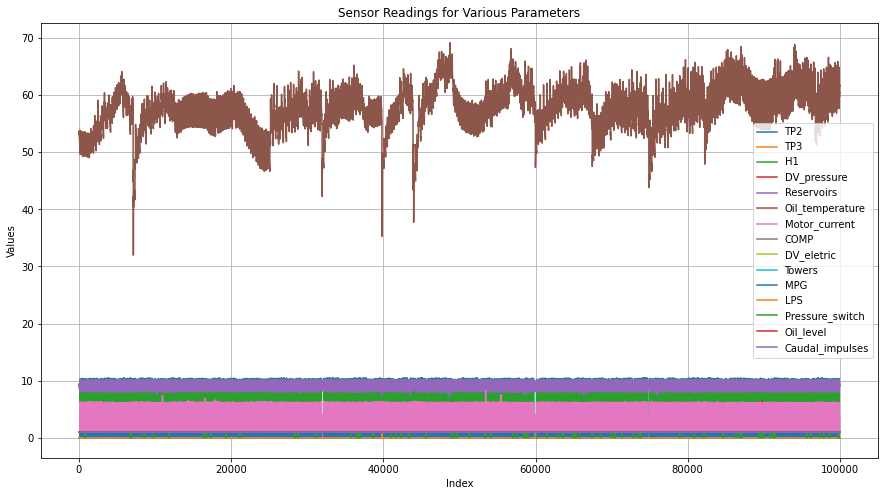

In [14]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Load the dataset (replace 'filtered_dataset.csv' with your actual filename)
# df = pd.read_csv('filtered_dataset.csv')

# # Create a subplot
plt.figure(figsize=(15, 8))

# List of columns to plot
columns_to_plot = [
    'TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs',
    'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric',
    'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 
    'Caudal_impulses'
]

# Iterate over the list of columns and plot each one
for column in columns_to_plot:
    plt.plot(filtered_df[column], label=column)

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Sensor Readings for Various Parameters')
plt.legend()
plt.grid()

# Show the plot
plt.show()


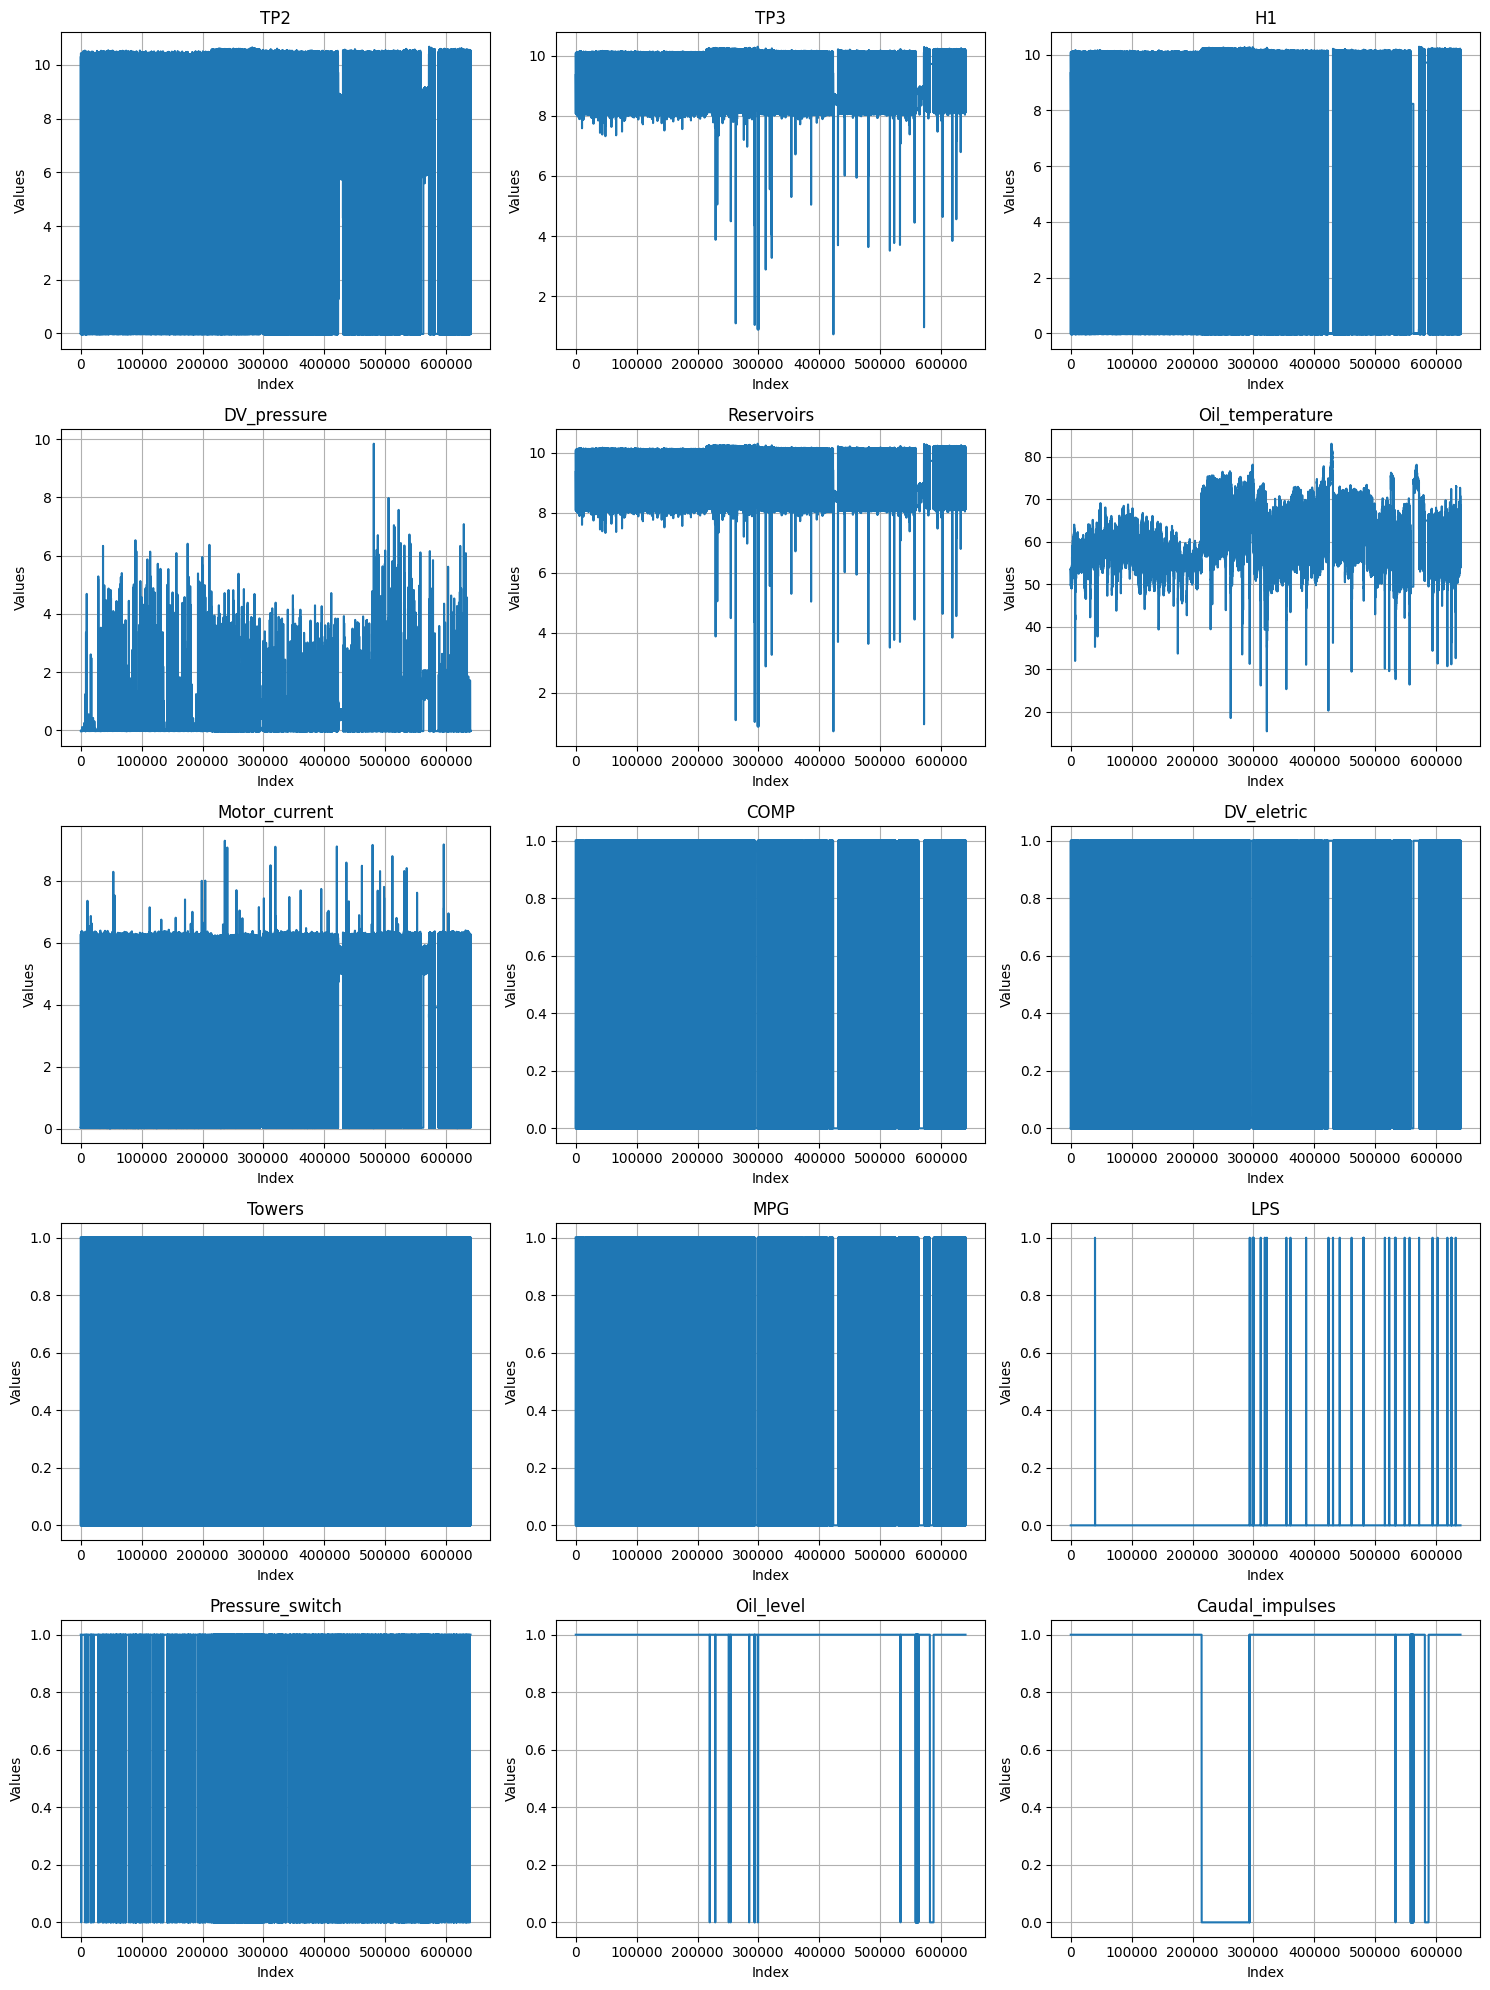

In [45]:
columns_to_plot = [
    'TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs',
    'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric',
    'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 
    'Caudal_impulses'
]

# Create subplots
num_columns = len(columns_to_plot)
num_rows = (num_columns + 2) // 3  # Adjust the number of rows based on how many columns you want in each row
fig, axs = plt.subplots(num_rows, 3, figsize=(15, num_rows * 4))

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Iterate over the columns and plot each one
for i, column in enumerate(columns_to_plot):
    axs[i].plot(filtered_df[column])
    axs[i].set_title(column)
    axs[i].set_xlabel('Index')
    axs[i].set_ylabel('Values')
    axs[i].grid()

# Remove any empty subplots (if num_columns is not a multiple of 3)
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [1]:
import pandas as pd

# Assuming your DataFrame is named 'df'
# Columns to be rounded to 3 decimal places
df=pd.read_csv('shorter_dataset.csv')
round_columns = [
    'TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 
    'Oil_temperature', 'Motor_current'
]

# Columns to convert binary values to integers
binary_columns = [
    'DV_eletric', 'COMP', 'Towers', 'MPG', 
    'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses'
]

# Round the specified columns to 3 decimal places
df[round_columns] = df[round_columns].round(3)

# Convert the binary columns to integers
df[binary_columns] = df[binary_columns].astype(int)

# Save the modified DataFrame to a CSV file
df.to_csv("shorter.csv", index=False)


In [5]:
import pandas as pd
df=pd.read_csv('shorter.csv')

# Ensure 'timestamp_minute' is in datetime format if not already done
df['timestamp_minute'] = pd.to_datetime(df['timestamp_minute'])

# Filter for months 6, 7, 8, and 9
new_dataset = df[df['timestamp_minute'].dt.month.isin([4, 5, 6, 7])]

# Display the new dataset
print(new_dataset)
# Save the new dataset to a CSV file
new_dataset.to_csv('JuneToSeptember.csv', index=True)


          timestamp_minute    TP2     TP3     H1  DV_pressure  Reservoirs  \
73638  2020-04-01 00:00:00 -0.014   8.559  8.547       -0.024       8.562   
73639  2020-04-01 00:01:00 -0.014   8.473  8.461       -0.024       8.476   
73640  2020-04-01 00:02:00 -0.014   8.372  8.361       -0.024       8.375   
73641  2020-04-01 00:03:00 -0.014   8.279  8.268       -0.025       8.281   
73642  2020-04-01 00:04:00 -0.015   8.190  8.181       -0.025       8.195   
...                    ...    ...     ...    ...          ...         ...   
216177 2020-07-31 23:55:00  7.210   8.431  0.032       -0.019       8.431   
216178 2020-07-31 23:56:00  9.825   9.540 -0.012       -0.019       9.537   
216179 2020-07-31 23:57:00  4.794  10.073  5.057       -0.015      10.071   
216180 2020-07-31 23:58:00 -0.016   9.976  9.968       -0.019       9.975   
216181 2020-07-31 23:59:00 -0.012   9.835  9.822       -0.019       9.834   

        Oil_temperature  Motor_current  DV_eletric  COMP  Towers  MPG  LPS 

In [6]:
import pandas as pd
df=pd.read_csv('shorter.csv')

# Ensure 'timestamp_minute' is in datetime format if not already done
df['timestamp_minute'] = pd.to_datetime(df['timestamp_minute'])

# Filter for months 6, 7, 8, and 9
new_dataset = df[df['timestamp_minute'].dt.month.isin([4,5,6, 7])]

# Display the new dataset
print(new_dataset)
# Save the new dataset to a CSV file
new_dataset.to_csv('AprilToJune.csv', index=True)


          timestamp_minute    TP2     TP3     H1  DV_pressure  Reservoirs  \
73638  2020-04-01 00:00:00 -0.014   8.559  8.547       -0.024       8.562   
73639  2020-04-01 00:01:00 -0.014   8.473  8.461       -0.024       8.476   
73640  2020-04-01 00:02:00 -0.014   8.372  8.361       -0.024       8.375   
73641  2020-04-01 00:03:00 -0.014   8.279  8.268       -0.025       8.281   
73642  2020-04-01 00:04:00 -0.015   8.190  8.181       -0.025       8.195   
...                    ...    ...     ...    ...          ...         ...   
216177 2020-07-31 23:55:00  7.210   8.431  0.032       -0.019       8.431   
216178 2020-07-31 23:56:00  9.825   9.540 -0.012       -0.019       9.537   
216179 2020-07-31 23:57:00  4.794  10.073  5.057       -0.015      10.071   
216180 2020-07-31 23:58:00 -0.016   9.976  9.968       -0.019       9.975   
216181 2020-07-31 23:59:00 -0.012   9.835  9.822       -0.019       9.834   

        Oil_temperature  Motor_current  DV_eletric  COMP  Towers  MPG  LPS 

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('shorter.csv')

# Ensure 'timestamp_minute' is in datetime format
df['timestamp_minute'] = pd.to_datetime(df['timestamp_minute'])

# Define the date range for the filter
start_date = '2020-04-17 00:00:00'
end_date = '2020-07-16 19:00:00'

# Filter the DataFrame based on the specified date range
filtered_df = df[(df['timestamp_minute'] >= start_date) & (df['timestamp_minute'] <= end_date)]

# Display the filtered dataset
print(filtered_df)

# Save the filtered dataset to a new CSV file
filtered_df.to_csv('filtered_april_to_july.csv', index=False)


          timestamp_minute    TP2     TP3     H1  DV_pressure  Reservoirs  \
92007  2020-04-17 00:00:00 -0.013   9.307  9.296       -0.024       9.306   
92008  2020-04-17 00:01:00 -0.013   9.224  9.212       -0.023       9.222   
92009  2020-04-17 00:02:00 -0.014   9.142  9.130       -0.023       9.141   
92010  2020-04-17 00:03:00 -0.014   9.062  9.050       -0.024       9.062   
92011  2020-04-17 00:04:00 -0.014   8.981  8.969       -0.025       8.982   
...                    ...    ...     ...    ...          ...         ...   
197052 2020-07-16 18:56:00  8.721   8.522 -0.012       -0.013       8.521   
197053 2020-07-16 18:57:00  9.313   9.301 -0.005       -0.012       9.299   
197054 2020-07-16 18:58:00  8.391  10.008  1.693       -0.012      10.005   
197055 2020-07-16 18:59:00 -0.016  10.006  9.999       -0.012      10.004   
197056 2020-07-16 19:00:00 -0.009   9.223  9.210       -0.013       9.221   

        Oil_temperature  Motor_current  DV_eletric  COMP  Towers  MPG  LPS 